In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load Boston Dataset

In [2]:
dataset = pd.read_csv('boston_housing.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
dataset.rename(columns={'MEDV':'Price'}, inplace=True)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [6]:
dataset.dropna(inplace=True)

# Correlation

In [7]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


* If the correlation is close to +1 or -1 then it means that the two
features are not providing any value in the prediction because they have similar effect.

* It's best to have collinearity near to 0 as the features would be completely different

# Visualizations

Text(0, 0.5, 'Price')

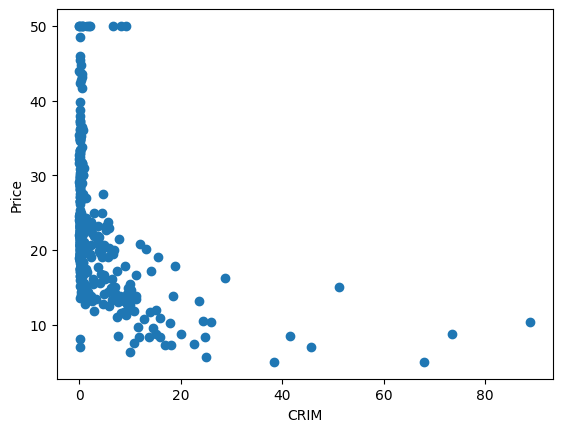

In [8]:
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel('CRIM')
plt.ylabel('Price')

As crime increases price drops.

Text(0, 0.5, 'Price')

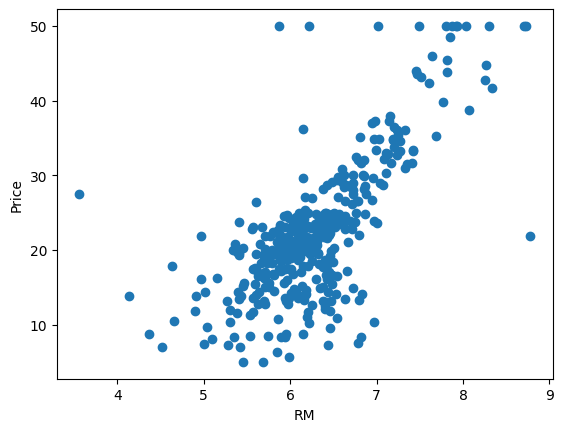

In [9]:
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel('RM')
plt.ylabel('Price')

As room increases price increases

<Axes: xlabel='RM', ylabel='Price'>

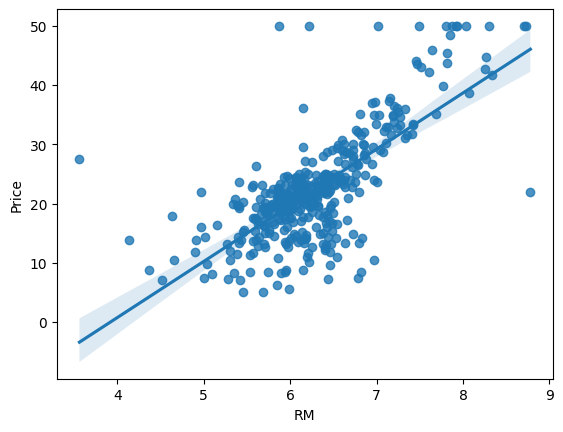

In [10]:
import seaborn as sns
sns.regplot(x='RM', y='Price', data=dataset)

<Axes: xlabel='CHAS', ylabel='Price'>

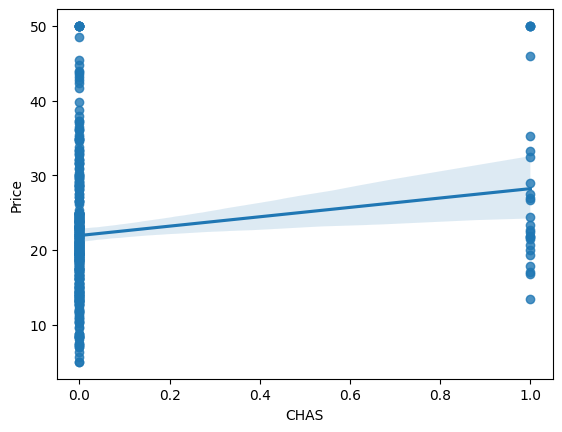

In [11]:
sns.regplot(x='CHAS', y='Price', data=dataset)

# PRE processing

In [12]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Scaling brings all the features in same unit and it helps gradient descent in converging.

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Let's import a pickle file of this scaler as we will need this when we build our real world app because the production data would also need scaling before we can send it to our prediction model.

In [15]:
import pickle
pickle.dump(sc,open('scaling.pkl', 'wb'))

* fit_transform builds the scaling technique and once built.
* transform simply mimics it.
* Hence we just use fit_transform once and after learning the scaling we apply it blindly.

# Model training

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

By doing this we create a hyperplane on X_train and y_train which makes a linear regression line.

In [17]:
print(regressor.intercept_)

22.336


In [18]:
print(regressor.coef_)

[-0.72440111  1.13086049  0.16867878  0.88086499 -2.27198603  3.52126417
 -0.82218845 -3.3191453   2.04199641 -2.07416946 -1.9414968   0.83749946
 -2.5081913 ]


In [19]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [20]:
reg_pred = regressor.predict(X_test)

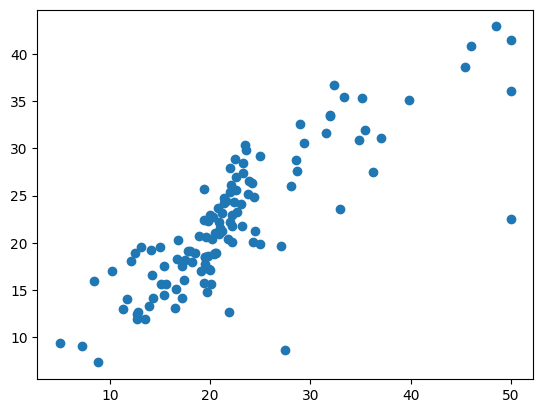

In [21]:
plt.scatter(y_test, reg_pred)

As the prediction is normal it means that our model has performed well.

In [22]:
residuals = y_test - reg_pred

Residuals is the distance between prediction and actual values.

/var/folders/1k/8slkzd357lj7270s470tsybw0000gn/T/ipykernel_56581/2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Price', ylabel='Density'>

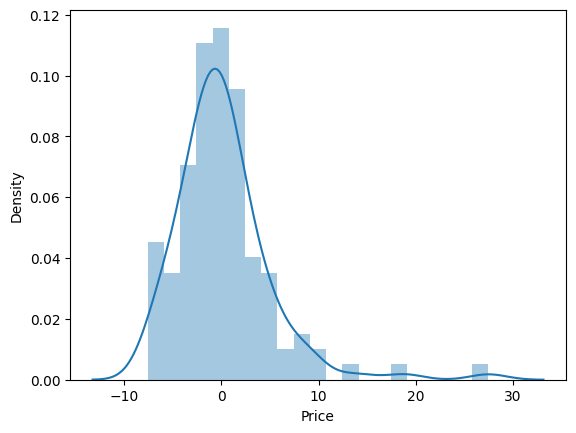

In [23]:
sns.distplot(residuals)

We should get a normal plot of residuals. It means that our model is predicting values closer to actual values.

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(f'MSE - {mean_squared_error(y_test, reg_pred)}')
print(f'MAE - {mean_absolute_error(y_test, reg_pred)}')
print(f'RMSE - {mean_squared_error(y_test, reg_pred)**(1/2)}')

MSE - 23.884522663593337
MAE - 3.2710371885085956
RMSE - 4.887179417986753


In [25]:
from sklearn.metrics import r2_score
print(f'R2 Score - {r2_score(y_test, reg_pred)}')

R2 Score - 0.6873411644615658


# Pickle the model for deployment

In [26]:
pickle.dump(regressor, open('linregmodel.pkl', 'wb'))

We have to store this model in write byte mode for the given path.

In [27]:
pickled_model = pickle.load(open('linregmodel.pkl', 'rb'))

When we load the pickle file, we do it in read mode as we don't want to change it.

In [28]:
pickled_model.predict(X_test)

array([16.02014897, 19.8786145 , 26.51655953, 41.55063799, 16.55982967,
       18.47726075, 28.72772643, 19.18189203, 28.41618661, 12.62781976,
       23.63025232, 14.75283979, 22.51882025, 25.38583201, 11.91321675,
       32.62806035, 27.52669354, 29.80343961, 25.18137589, 24.84585359,
       18.2815523 , 31.16276103, 20.93213088, 18.89590473, 18.89636369,
       23.18138028, 17.01858916,  9.40480637, 23.30544875, 23.73480932,
        8.67844375, 22.23695138, 18.86504307, 26.94051835, 15.62089084,
       14.15565601, 22.90865673, 18.16449343, 22.69713891, 13.1285298 ,
       24.45702888, 12.96727111, 29.22904169, 21.80060237, 33.59967057,
       14.42296503, 19.12540005, 17.08419535, 12.61256312, 14.15835498,
       20.06204569, 18.82848665, 12.48695337, 31.92103963,  7.30296475,
       17.02061099, 18.57190745, 18.9158022 , 21.26549375, 26.3659792 ,
       17.91185735, 18.03767546, 21.73187005, 19.63284617, 21.29438092,
       40.87167846, 19.59199498, 30.59881489, 15.62699723, 30.87

This is probaly same as the y_pred